# 第2章 贝叶斯模型
具体理论，在教程中已经说的而比较清楚了，这里重点学习下如何应用。  
其实就是sklearn调包。
  


## 高斯朴素贝叶斯
高斯朴素贝叶斯算法是假设特征的可能性(即概率)为高斯分布。
  
  
``` class sklearn.naive_bayes.GaussianNB(priors=None) ```  
  
```priors```: 先验概率大小，如果没有给定，模型则根据样本数据自己计算（利用极大似然法）。    

**对象**       
  
```class_prior_```: 每个样本的概率  
  
```class_count```: 每个类别的样本数量  
  
```theta_```: 每个类别中每个特征的均值  
  
```sigma_```: 每个类别中每个特征的方差  
    
  
## 多项式分布贝叶斯    
适用于服从多项分布的特征数据  。  
   
   
```class sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)```        
    
```alpha```: 先验平滑因子，默认等于1，当等于1时表示拉普拉斯平滑。      
    
```fit_prior```: 是否去学习类的先验概率，默认是True    
  
```class_prior```: 各个类别的先验概率，如果没有指定，则模型会根据数据自动学习， 每个类别的先验概率相同，等于类标记总个数N分之一。    
    
**对象**  
```class_log_prior_```: 每个类别平滑后的先验概率  
  
```intercept_```: 是朴素贝叶斯对应的线性模型，其值和class_log_prior_相同feature_log_prob_:给定特征类别的对数概率(条件概率)。 特征的条件概率=（指定类下指定特征出现的次数+alpha）/（指定类下所有特征出现次数之和+类的可能取值个数*alpha）coef_: 是朴素贝叶斯对应的线性模型，其值和feature_log_prob相同  
  
```class_count_```: 训练样本中各类别对应的样本数    

```feature_count_```: 每个类别中各个特征出现的次数    
  
  
## 伯努利朴素贝叶斯    
用于多重伯努利分布的数据，即有多个特征，但每个特征都假设是一个二元 (Bernoulli, boolean) 变量。    

```class sklearn.naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)```        

```alpha```:平滑因子，与多项式中的alpha一致。    
  
```binarize```:样本特征二值化的阈值，默认是0。如果不输入，则模型会认为所有特征都已经是二值化形式了；如果输入具体的值，则模型会把大于该值的部分归为一类，小于的归为另一类。  

```fit_prior```:是否去学习类的先验概率，默认是True  

```class_prior```:各个类别的先验概率，如果没有指定，则模型会根据数据自动学习， 每个类别的先验概率相同，等于类标记总个数N分之一。  

**对象**    
```class_log_prior_```:每个类别平滑后的先验对数概率。

```feature_log_prob_```:给定特征类别的经验对数概率。

```class_count_```:拟合过程中每个样本的数量。

```feature_count_```:拟合过程中每个特征的数量。

**方法**    
贝叶斯的方法和其他模型的方法一致。  
  
```fit(X,Y)```: 在数据集(X,Y)上拟合模型。  
  
```get_params()```: 获取模型参数。  
  
```predict(X)```: 对数据集X进行预测。  
  
```predict_log_proba(X)```: 对数据集X预测，得到每个类别的概率对数值。predict_proba(X):对数据集X预测，得到每个类别的概率。  
  
```score(X,Y)```: 得到模型在数据集(X,Y)的得分情况。  

## 实战一 官方案例一
官方案例   
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 生成数据
import numpy as np
features_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
labels_train = np.array([1, 1, 1, 2, 2, 2])
# 引入高斯朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
# 建模
clf = GaussianNB()
# fit训练模型
clf.fit(features_train, labels_train) 
# 输出预测结果
features_test = np.array([[-0.8,-1]])
labels_test = np.array([1])
pred = clf.predict(features_test)
print(pred)
# 准确度评估 
# 正确数/总数
# 方法1
accuracy = clf.score(features_test, labels_test)
accuracy
# 方法2
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(pred,labels_test)
accuracy2




[1]


1.0

## 实战二 官方案例二
官方案例 
https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration.html#sphx-glr-auto-examples-calibration-plot-calibration-py


GaussianNB(priors=None, var_smoothing=1e-09)

CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=2, method='isotonic')

CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=2, method='sigmoid')

Brier scores: (the smaller the better)
No calibration: 0.104
With isotonic calibration: 0.084
With sigmoid calibration: 0.109


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Data')

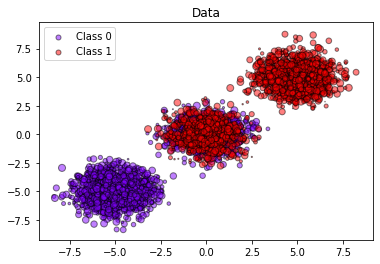

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split


n_samples = 50000
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y, sample_weight, test_size=0.9, random_state=42)

# Gaussian Naive-Bayes with no calibration
clf = GaussianNB()
clf.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
clf_isotonic.fit(X_train, y_train, sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf, sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic, sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid, sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)

# #############################################################################
# Plot the data and the predicted probabilities
plt.figure()
y_unique = np.unique(y)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X_train[y_train == this_y]
    this_sw = sw_train[y_train == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50,
                c=color[np.newaxis, :],
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")


plt.show()

## 实战三 小麦数据集案例 

数据集地址: https://archive.ics.uci.edu/ml/datasets/seeds 
  

GaussianNB(priors=None, var_smoothing=1e-09)

数据集预测结果: [1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3]
[[ 0.66344838 -1.41732098]
 [ 0.31566651 -2.68922915]
 [-0.6604993  -1.13150635]
 [-1.0552759  -1.62119002]]


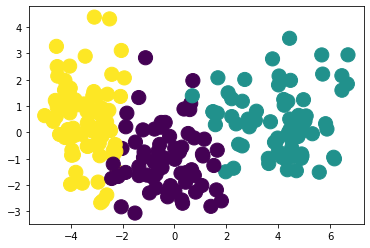

In [3]:
#第一部分 载入数据集
import pandas as pd
data = pd.read_csv("./seeds_dataset.csv")
X = data.drop(['Type'], axis=1)
Y = data['Type']
 
 #第二部分 导入模型
from sklearn.naive_bayes import GaussianNB  
clf = GaussianNB()
clf.fit(X, Y)      
pre = clf.predict(X)
print(u"数据集预测结果:", pre)

#第三部分 降维处理
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newData = pca.fit_transform(X)
print(newData[:4])

#第四部分 绘制图形
import matplotlib.pyplot as plt
L1 = [n[0] for n in newData]
L2 = [n[1] for n in newData]
plt.scatter(L1,L2,c=pre,s=200)
plt.show()

## 参考资料
朴素贝叶斯分类器详解及中文文本舆情分析（附代码实践） https://www.tinymind.cn/articles/3802